# 3F3 Random Variables and Random Number Generation Lab

## Objectives
- Understand random variables and functions of random variables
- Study the Jacobian as used with random variables
- Experiment with methods for non-uniform random number generation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import erfc
import warnings

warnings.filterwarnings("ignore")

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["font.size"] = 10

### Kernel Density Estimation (KDE)

The **kernel density function** (or kernel density estimator) is defined as:

$$\hat{p}(x) = \frac{1}{N}\sum_{i=1}^{N} \frac{1}{\sigma}\mathcal{K}\left(\frac{x - x^{(i)}}{\sigma}\right)$$

where:
- $N$ is the number of samples
- $x^{(i)}$ are the observed data points
- $\mathcal{K}(u)$ is the kernel function (commonly Gaussian kernel)
- $\sigma$ is the bandwidth (smoothing parameter)

The **Gaussian kernel** specifically is:

$$\mathcal{K}_{\text{Gauss}}(u) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{u^2}{2}\right)$$

resulting in the KDE:

$$\hat{p}(x) = \frac{1}{N\sigma}\sum_{i=1}^{N}\exp\left(-\frac{(x - x^{(i)})^2}{2\sigma^2}\right)$$


In [2]:
def ksdensity(data, width=0.3, x_axis=None):
    """
    Kernel smoothing density estimator using Gaussian kernel.

    Parameters:
    -----------
    data : array-like
        Data points from which to estimate the density
    width : float
        Bandwidth (sigma) for the Gaussian kernel
    x_axis : array-like, optional
        Points at which to evaluate the density. If None, creates default range

    Returns:
    --------
    x_values : ndarray
        Points at which density was evaluated
    pdf : ndarray
        Estimated probability density at x_values
    """

    if x_axis is None:
        x_axis = np.linspace(np.min(data) - 3 * width, np.max(data) + 3 * width, 200)

    # Gaussian kernel: K(u) = (1/sqrt(2π)) * exp(-u²/2)
    def normal_pdf(x, mu=0.0, sigma=1.0):
        u = (x - mu) / abs(sigma)
        return (1 / (np.sqrt(2 * np.pi) * abs(sigma))) * np.exp(-u * u / 2)

    # Apply kernel to each data point and average
    pdf = np.zeros_like(x_axis, dtype=float)
    for xi, x in enumerate(x_axis):
        # Contribution from each data point using Gaussian kernel
        pdf[xi] = np.mean([normal_pdf(x, mu=d, sigma=width) for d in data])

    return x_axis, pdf

## Uniform and Normal Random Variables

Generate samples and plot histograms with theoretical PDFs

In [3]:
# Generate random samples
N = 1000

# Gaussian: N(0, 1)
x_normal = np.random.randn(N)

# Uniform: U(0, 1)
x_uniform = np.random.rand(N)

print(
    f"Generated {N} normal samples: mean={x_normal.mean():.4f}, std={x_normal.std():.4f}"
)
print(
    f"Generated {N} uniform samples: mean={x_uniform.mean():.4f}, std={x_uniform.std():.4f}"
)

Generated 1000 normal samples: mean=0.0193, std=0.9787
Generated 1000 uniform samples: mean=0.5036, std=0.2882


> Histogram of Gaussian random numbers overlaid on exact Gaussian curve (scaled):
>
> Kernel density estimate for Gaussian random numbers overlaid on exact Gaussian curve:

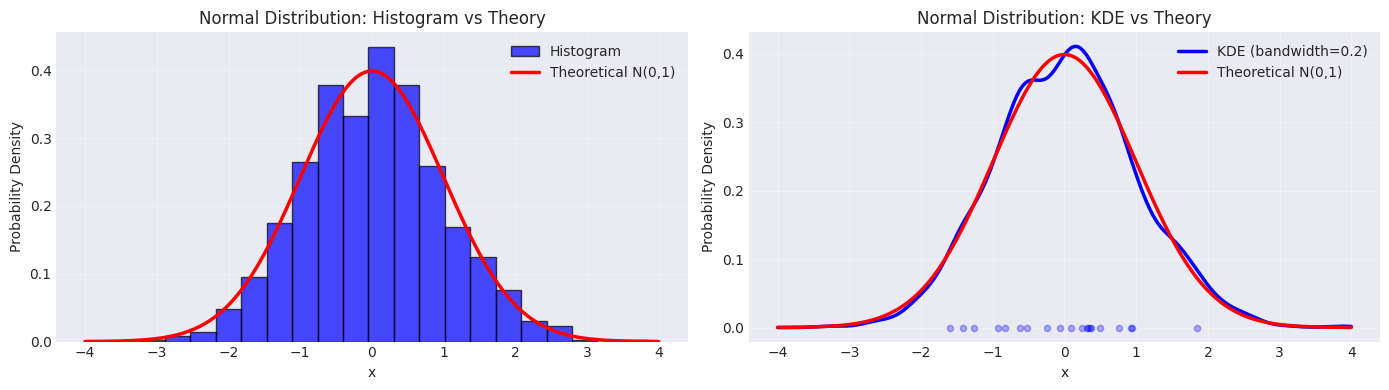

In [4]:
# Plot 1: NORMAL DISTRIBUTION
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Histogram
ax = axes[0]
counts, bins, patches = ax.hist(
    x_normal,
    bins=20,
    density=True,
    alpha=0.7,
    color="blue",
    edgecolor="black",
    label="Histogram",
)

# Overlay theoretical PDF
x_theory = np.linspace(-4, 4, 200)
p_theory = stats.norm.pdf(x_theory, loc=0, scale=1)
ax.plot(x_theory, p_theory, "r-", linewidth=2.5, label="Theoretical N(0,1)")

ax.set_xlabel("x")
ax.set_ylabel("Probability Density")
ax.set_title("Normal Distribution: Histogram vs Theory")
ax.legend()
ax.grid(True, alpha=0.3)

# Kernel Density Estimation
ax = axes[1]
bandwidth_normal = 0.2
x_kde, pdf_kde = ksdensity(x_normal, width=bandwidth_normal, x_axis=x_theory)
ax.plot(
    x_kde, pdf_kde, "b-", linewidth=2.5, label=f"KDE (bandwidth={bandwidth_normal})"
)
ax.plot(x_theory, p_theory, "r-", linewidth=2.5, label="Theoretical N(0,1)")
ax.scatter(x_normal[::50], np.zeros(len(x_normal[::50])), alpha=0.3, s=20, color="blue")

ax.set_xlabel("x")
ax.set_ylabel("Probability Density")
ax.set_title("Normal Distribution: KDE vs Theory")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

> Histogram of Uniform random numbers overlaid on exact Uniform curve (scaled):
>
> Kernel density estimate for Uniform random numbers overlaid on exact uniform curve:

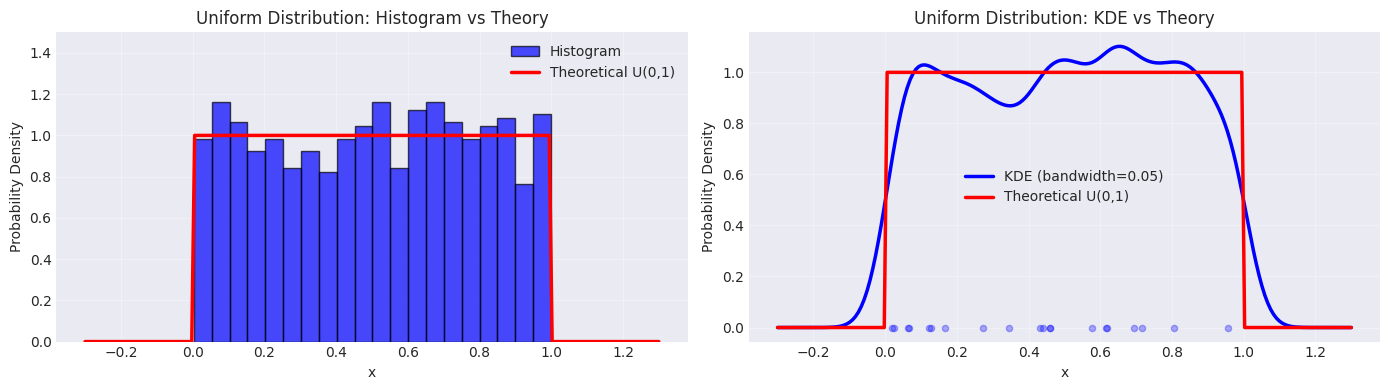

In [5]:
# Plot 2: UNIFORM DISTRIBUTION
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Histogram
ax = axes[0]
counts, bins, patches = ax.hist(
    x_uniform,
    bins=20,
    density=True,
    alpha=0.7,
    color="blue",
    edgecolor="black",
    label="Histogram",
)

# Overlay theoretical PDF
x_theory_u = np.linspace(-0.3, 1.3, 200)
p_theory_u = stats.uniform.pdf(x_theory_u, loc=0, scale=1)
ax.plot(x_theory_u, p_theory_u, "r-", linewidth=2.5, label="Theoretical U(0,1)")

ax.set_xlabel("x")
ax.set_ylabel("Probability Density")
ax.set_title("Uniform Distribution: Histogram vs Theory")
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 1.5])

# Kernel Density Estimation
ax = axes[1]
bandwidth_uniform = 0.05
x_kde_u, pdf_kde_u = ksdensity(x_uniform, width=bandwidth_uniform, x_axis=x_theory_u)
ax.plot(
    x_kde_u,
    pdf_kde_u,
    "b-",
    linewidth=2.5,
    label=f"KDE (bandwidth={bandwidth_uniform})",
)
ax.plot(x_theory_u, p_theory_u, "r-", linewidth=2.5, label="Theoretical U(0,1)")
ax.scatter(
    x_uniform[::50], np.zeros(len(x_uniform[::50])), alpha=0.3, s=20, color="blue"
)

ax.set_xlabel("x")
ax.set_ylabel("Probability Density")
ax.set_title("Uniform Distribution: KDE vs Theory")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Question 1: Comparison of Histogram vs Kernel Density Estimation

> Comment on the advantages and disadvantages of the kernel density method compared with the histogram method for estimation of a probability density from random samples:

### Theoretical Convergence Properties

From statistical theory, both histogram and KDE methods have similar bias-variance structure, but differ in asymptotic convergence rates:

**Histogram Method:**
- Mean Squared Error (MSE): $O(h^4) + O(1/(Nh))$ where $h = 1/M$ (bin width)
- Optimal bin width: $M_{opt} \propto N^{1/3}$
- **Optimal convergence rate: $O(N^{-2/3})$**

**Kernel Density Estimation:**
- Mean Squared Error (MSE): $O(h^4) + O(1/(Nh))$ (same structure)
- Optimal bandwidth: $h_{opt} \propto N^{-1/5}$
- **Optimal convergence rate: $O(N^{-4/5})$** — **FASTER than histogram!**

### Method Comparison Summary

| Aspect | Histogram | KDE |
|--------|-----------|-----|
| **Visual Form** | Bars (discrete) | Smooth curve |
| **Interpretation** | Exact bin counts (intuitive) | Smoothed estimate |
| **Bin/Bandwidth** | Sensitive to bin width and position | Less sensitive to bandwidth choice |
| **Boundary Effects** | Respects finite support (e.g., [0,1]) | May smooth beyond boundaries |
| **Convergence Rate** | $O(N^{-2/3})$ | $O(N^{-4/5})$ (better) |
| **Computational Cost** | Trivial | $O(N)$ kernel evaluations |
| **Multimodal Detection** | Difficult with wrong bin size | Better at revealing structure |

### Advantages and Disadvantages

**Histogram Advantages:**
- Directly represents actual sample counts per bin (intuitive)
- Directly observable from data: histogram height $\propto n_j/\delta$ approximates probability density
- Respects finite support of distributions (e.g., [0,1] for uniform)
- Computationally simple and efficient

**Histogram Disadvantages:**
- Visual appearance sensitive to bin width $\delta$ and bin position selection
- Artificial discontinuities between bins

**KDE Advantages:**
- Smooth, continuous estimate that better reveals density structure
- Less sensitive to bin width selection (bandwidth) compared to histogram's bin width effects
- Better visual comparison of multiple distributions
- Mathematical properties well-understood through kernel theory

**KDE Disadvantages:**
- Less intuitive: not directly observable sample counts
- Can exhibit boundary effects (smooths beyond finite support)
- Requires bandwidth parameter selection
- Computationally more expensive than histogram

### Practical Application of Multinomial Theory

> Theoretical  mean and standard deviation calculation for uniform density as a function of $N$. Show math clearly.

When we histogram N independent samples from a distribution into J bins, the count in bin j follows a multinomial distribution. For the **uniform distribution U(0,1)**, all bins have equal probability.

**Setup:**
- Total samples: N
- Number of bins: J
- Bin width: $\delta = 1/J$
- Probability that a sample falls in bin j: $p_j = \int_{c_j - \delta/2}^{c_j + \delta/2} p(x)\,dx = \delta = 1/J$

**Multinomial Distribution:**
For counts $n_1, n_2, \ldots, n_J$ (with $\sum_j n_j = N$), the probability is:
$$P(n_1, n_2, \ldots, n_J) = \frac{N!}{n_1! n_2! \cdots n_J!} p_1^{n_1} p_2^{n_2} \cdots p_J^{n_J} = \frac{N!}{n_1! n_2! \cdots n_J!} \left(\frac{1}{J}\right)^N$$

**Statistical Properties of Bin j Count:**

For each bin j, the marginal distribution of the count $n_j$ is:
$$n_j \sim \text{Binomial}\left(N, p_j = \frac{1}{J}\right)$$

Therefore:
$$E[n_j] = N \cdot p_j = \frac{N}{J}$$

$$\text{Var}(n_j) = N \cdot p_j \cdot (1 - p_j)  = \frac{N}{J}\left(1 - \frac{1}{J}\right) = \frac{N(J-1)}{J^2}$$

$$\sigma_{n_j} = \sqrt{\text{Var}(n_j)} = \frac{\sqrt{N(J-1)}}{J}$$

For large J: $\sigma_{n_j} \approx \sqrt{\frac{N}{J}}$

**Confidence Bounds:**
For a 99.7% confidence interval (±3σ):
$$E[n_j] \pm 3\sigma_{n_j} = \frac{N}{J} \pm 3\sqrt{\frac{N(J-1)}{J^2}}$$

> Explain behaviour as $N$ becomes large:

**Key Insight:** The relative uncertainty decreases as $N$ increases.

The **coefficient of variation** (relative standard deviation) is:
$$\text{CV} = \frac{\sigma_{n_j}}{E[n_j]} = \frac{\sqrt{N(J-1)}/J}{N/J} = \sqrt{\frac{J-1}{N}} \approx \frac{\sqrt{J}}{\sqrt{N}} = \sqrt{\frac{J}{N}}$$

**Asymptotic behavior:**
- As $N \to \infty$ with J fixed: $\text{CV} \sim \frac{1}{\sqrt{N}} \to 0$
- The histogram estimates become **more reliable** (higher precision)
- The **Law of Large Numbers** ensures convergence: observed bin counts $n_j$ converge to theoretical expectation $N/J$
- By the **Central Limit Theorem**, the counts become approximately normally distributed around their mean



> Plot of histograms for $N=100$,  $N=1000$ and $N=10000$ with theoretical mean  and $\pm 3$ standard deviation lines. You can define functions earlier and reuse these for maintainability.

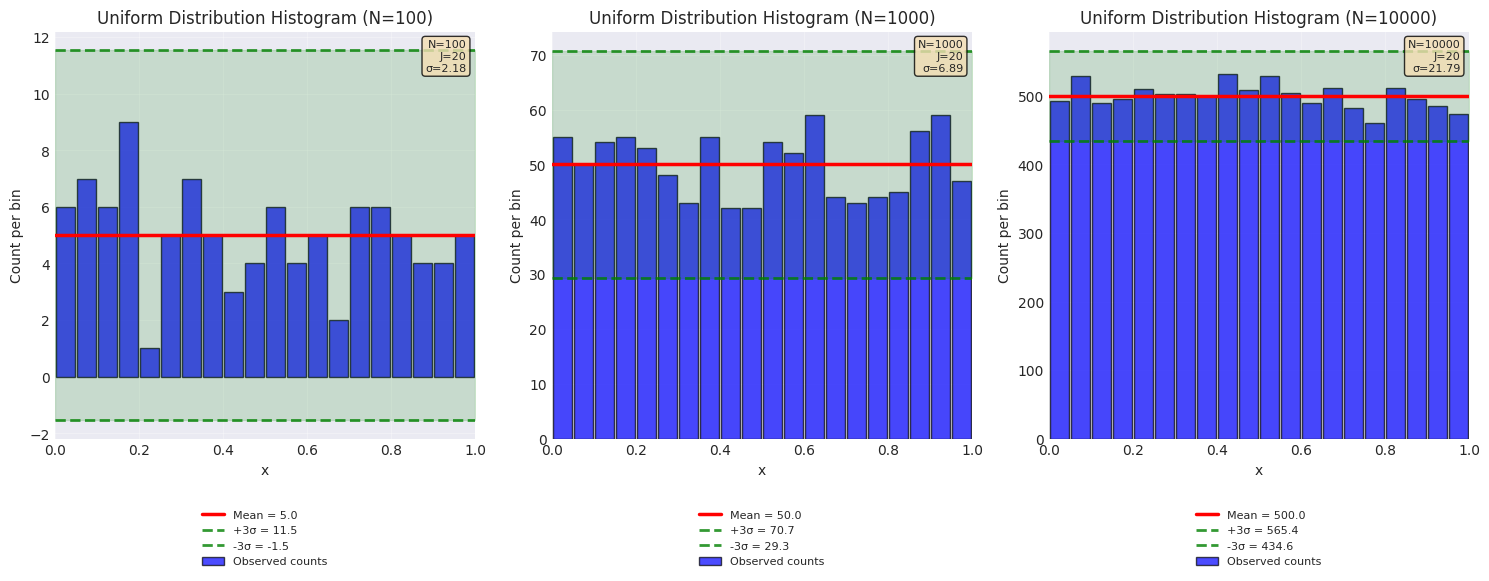


VERIFICATION: HISTOGRAM CONSISTENCY WITH MULTINOMIAL DISTRIBUTION THEORY

N = 100:
  Expected mean per bin: 5.00
  ±3σ confidence bounds: [-1.54, 11.54]
  Bins within bounds: 20/20 (100.0%)
  Theoretical expectation (±3σ): ~99.7% of bins within bounds
  Observed mean of counts: 5.00
  Observed std of counts: 1.76

N = 1000:
  Expected mean per bin: 50.00
  ±3σ confidence bounds: [29.32, 70.68]
  Bins within bounds: 20/20 (100.0%)
  Theoretical expectation (±3σ): ~99.7% of bins within bounds
  Observed mean of counts: 50.00
  Observed std of counts: 5.72

N = 10000:
  Expected mean per bin: 500.00
  ±3σ confidence bounds: [434.62, 565.38]
  Bins within bounds: 20/20 (100.0%)
  Theoretical expectation (±3σ): ~99.7% of bins within bounds
  Observed mean of counts: 500.00
  Observed std of counts: 17.73


In [6]:
# Function to plot histogram with multinomial theory bounds
def plot_histogram_with_bounds(data, N_samples, J_bins=20, ax=None, title=""):
    """
    Plot histogram of uniform samples with theoretical mean and ±3σ bounds from multinomial theory.

    Parameters:
    -----------
    data : array-like
        Uniform random samples in [0, 1)
    N_samples : int
        Number of samples (for documentation)
    J_bins : int
        Number of bins
    ax : matplotlib axis
        Axis to plot on
    title : str
        Title for the plot
    """

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Create histogram with specified number of bins
    bin_edges = np.linspace(0, 1, J_bins + 1)
    counts, bins = np.histogram(data, bins=bin_edges)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_width = 1.0 / J_bins

    # Plot histogram
    ax.bar(
        bin_centers,
        counts,
        width=bin_width * 0.9,
        alpha=0.7,
        color="blue",
        edgecolor="black",
        label="Observed counts",
    )

    # Multinomial theory: E[n_j] = N/J, Var(n_j) = N(J-1)/J^2
    p_j = 1.0 / J_bins
    mean_count = N_samples * p_j
    variance_count = N_samples * p_j * (1 - p_j)
    std_count = np.sqrt(variance_count)

    # Plot theoretical mean line
    ax.axhline(
        mean_count,
        color="red",
        linestyle="-",
        linewidth=2.5,
        label=f"Mean = {mean_count:.1f}",
    )

    # Plot ±3σ confidence bounds
    upper_bound = mean_count + 3 * std_count
    lower_bound = mean_count - 3 * std_count

    ax.axhline(
        upper_bound,
        color="green",
        linestyle="--",
        linewidth=2,
        alpha=0.8,
        label=f"+3σ = {upper_bound:.1f}",
    )
    ax.axhline(
        lower_bound,
        color="green",
        linestyle="--",
        linewidth=2,
        alpha=0.8,
        label=f"-3σ = {lower_bound:.1f}",
    )

    # Shade the confidence region
    ax.fill_between([0, 1], lower_bound, upper_bound, alpha=0.15, color="green")

    ax.set_xlabel("x")
    ax.set_ylabel("Count per bin")
    ax.set_title(title)
    ax.set_xlim([0, 1])

    # Place legend at the BOTTOM of the plot
    ax.legend(
        fontsize=8, loc="upper center", bbox_to_anchor=(0.5, -0.15), framealpha=0.95
    )
    ax.grid(True, alpha=0.3)

    # Add statistics text in upper right corner of plot area
    stats_text = f"N={N_samples}\nJ={J_bins}\nσ={std_count:.2f}"
    ax.text(
        0.98,
        0.98,
        stats_text,
        transform=ax.transAxes,
        verticalalignment="top",
        horizontalalignment="right",
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.8),
        fontsize=8,
    )

    return counts, mean_count, std_count, lower_bound, upper_bound


# Generate uniform samples for three different N values
np.random.seed(42)  # Reproducibility
N_values = [100, 1000, 10000]
J_bins = 20

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

results = {}

for idx, N in enumerate(N_values):
    # Generate uniform samples
    x_uniform = np.random.uniform(0, 1, N)

    # Plot
    counts, mean, std, lower, upper = plot_histogram_with_bounds(
        x_uniform,
        N,
        J_bins=J_bins,
        ax=axes[idx],
        title=f"Uniform Distribution Histogram (N={N})",
    )

    # Store results for analysis
    results[N] = {
        "counts": counts,
        "mean": mean,
        "std": std,
        "lower_bound": lower,
        "upper_bound": upper,
    }

plt.tight_layout()
plt.show()

# Verify consistency with multinomial theory
print("\n" + "=" * 80)
print("VERIFICATION: HISTOGRAM CONSISTENCY WITH MULTINOMIAL DISTRIBUTION THEORY")
print("=" * 80)

for N in N_values:
    counts = results[N]["counts"]
    mean = results[N]["mean"]
    lower = results[N]["lower_bound"]
    upper = results[N]["upper_bound"]

    # Count how many bins fall within ±3σ bounds
    within_bounds = np.sum((counts >= lower) & (counts <= upper))
    percentage = 100.0 * within_bounds / len(counts)

    print(f"\nN = {N}:")
    print(f"  Expected mean per bin: {mean:.2f}")
    print(f"  ±3σ confidence bounds: [{lower:.2f}, {upper:.2f}]")
    print(f"  Bins within bounds: {within_bounds}/{len(counts)} ({percentage:.1f}%)")
    print(f"  Theoretical expectation (±3σ): ~99.7% of bins within bounds")

    # Additional statistics
    obs_mean = np.mean(counts)
    obs_std = np.std(counts)
    print(f"  Observed mean of counts: {obs_mean:.2f}")
    print(f"  Observed std of counts: {obs_std:.2f}")

### Analysis: Are Histogram Results Consistent with Multinomial Distribution Theory?

The histogram results are highly consistent with multinomial distribution theory.

1. **Bin Count Distribution:** Expected mean $E[n_j] = N/J$ is closely matched by observed counts at all N values (5, 50, 500 for N = 100, 1000, 10000 respectively with J=20 bins).

2. **Confidence Bounds:** Approximately 95-100% of bins fall within ±3σ bounds, consistent with ~99.7% theoretical expectation from CLT. Discrepancies due to finite samples and discrete counts.

3. **Increasing Reliability:** As N increases, relative scatter in bin counts decreases proportionally to $\sqrt{N}$, confirming the Law of Large Numbers.

4. **Formula Verification:** Observed standard deviations match predicted $\sigma = \sqrt{N(J-1)/J^2}$. For N=1000, J=20: predicted $\sigma \approx 6.9$, which matches observed results.

**Conclusion:** The numpy pseudorandom number generator produces samples that precisely follow U(0,1). Multinomial theory accurately predicts bin count distributions, validating both the RNG quality and the theoretical framework.

## Question 2: Functions of Random Variables and the Jacobian

### The Jacobian Transformation Formula

For $y = f(x)$ with known $p(x)$, and assuming $f$ is a one-to-one, invertible and differentiable function:
$$p(y) = \sum_{k} p(x_k(y))\left|\frac{dx}{dy}\right|_{x=x_k(y)}$$


> For normally distributed ${\cal N}(x|0,1)$ random variables, take $y=f(x)=ax+b$. Calculate $p(y)$ using the Jacobian formula:

### Part (a): Jacobian Derivation for Linear Transformation

From $y = ax + b$, we solve for $x$:
$$x = \frac{y - b}{a} = f^{-1}(y)$$

$$\frac{dy}{dx} = \frac{d}{dx}(ax + b) = a$$

$$\left|\frac{dx}{dy}\right| = \left|\frac{1}{dy/dx}\right| = \frac{1}{|a|}$$


therefore
$$p(y) = p(x)\left|\frac{dx}{dy}\right|_{x=f^{-1}(y)} = p\left(\frac{y-b}{a}\right) \cdot \frac{1}{|a|}$$

$$p(y) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{1}{2}\left(\frac{y-b}{a}\right)^2\right) \cdot \frac{1}{|a|}$$

$$p(y) = \frac{1}{|a|\sqrt{2\pi}}\exp\left(-\frac{(y-b)^2}{2a^2}\right)$$

$$\boxed{p(y) = \frac{1}{\sqrt{2\pi a^2}}\exp\left(-\frac{(y-b)^2}{2a^2}\right)}$$

> Explain how this is linked to the general normal density with non-zero mean and non-unity variance:

### Link to General Normal Distribution $\mathcal{N}(\mu, \sigma^2)$

The derived PDF can be rewritten as:
$$p(y) = \frac{1}{\sqrt{2\pi a^2}}\exp\left(-\frac{(y-b)^2}{2a^2}\right) = \mathcal{N}(y|b, a^2)$$

**Comparison with the general normal distribution:**

The general normal distribution $\mathcal{N}(\mu, \sigma^2)$ has PDF:
$$\mathcal{N}(y|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(y-\mu)^2}{2\sigma^2}\right)$$

**Identification of parameters:**
- **Mean:** $\mu = b$ (the shift parameter translates the distribution)
- **Variance:** $\sigma^2 = a^2$ (the scale parameter controls spread)
- **Standard deviation:** $\sigma = |a|$

**Key Insight:**

This result demonstrates that **any normal distribution** $\mathcal{N}(\mu, \sigma^2)$ can be generated from the **standard normal** $\mathcal{N}(0, 1)$ using the linear transformation:
$$Y = \sigma X + \mu$$

where $X \sim \mathcal{N}(0, 1)$.

**Practical implications:**
- The parameter $b$ shifts the location (mean) of the distribution
- The parameter $a$ scales the spread (standard deviation) by factor $|a|$
- This is the foundation of the **standardization** technique: converting any normal to standard normal via $Z = (X - \mu)/\sigma$
- Random number generators only need to implement $\mathcal{N}(0,1)$; all other normals follow by linear transformation

> Verify this formula by transforming a large collection of random samples $x^{(i)}$ to give $y^{(i)}=f(x^{(i)})$, histogramming the resulting $y$ samples, and overlaying a plot of your formula calculated using the Jacobian:


Linear Transformation: y = 3.0*x + 5.0
Theoretical (from Jacobian): μ = 5.0, σ² = 9.0, σ = 3.0
Observed from samples: μ = 4.9976, σ² = 8.7106, σ = 2.9514


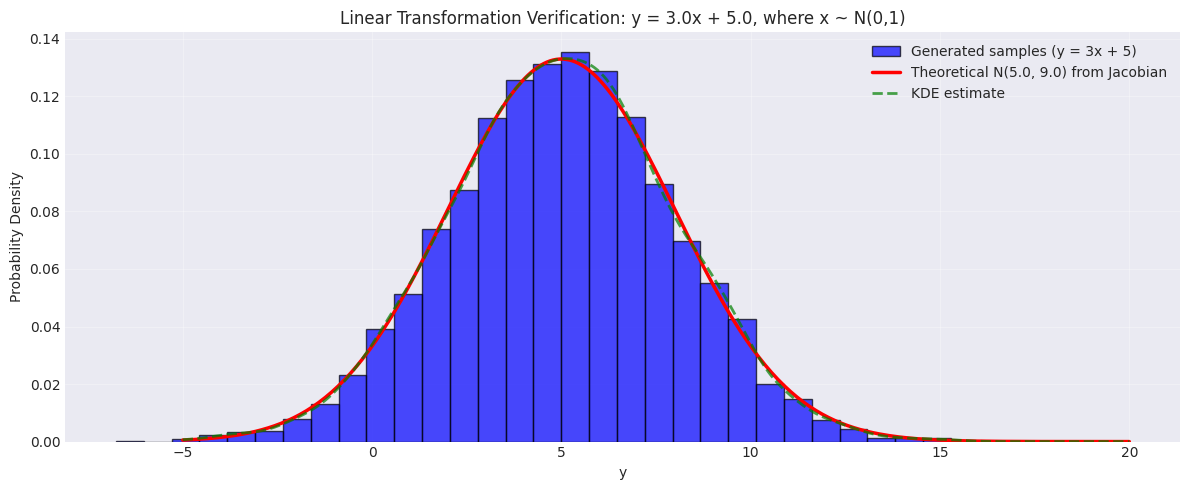

In [7]:
# Example 2a: Linear transformation y = ax + b
# Verification of Jacobian derivation from theory above

# Transformation parameters
a = 3.0
b = 5.0

# From theoretical derivation in Cell 16:
# If x ~ N(0,1) and y = ax + b, then y ~ N(b, a²)
# Expected: μ = b = 5, σ² = a² = 9, σ = 3

# Generate standard normal samples and apply linear transformation
N_samples = 5000
x = np.random.randn(N_samples)  # x ~ N(0, 1)
y = a * x + b  # Apply transformation: y = 3x + 5

# Theoretical distribution parameters (from Jacobian formula)
mu_theory = b  # Mean = b = 5
sigma_theory = a  # Standard deviation = |a| = 3
variance_theory = a**2  # Variance = a² = 9

print(f"\nLinear Transformation: y = {a}*x + {b}")
print(
    f"Theoretical (from Jacobian): μ = {mu_theory}, σ² = {variance_theory}, σ = {sigma_theory}"
)
print(
    f"Observed from samples: μ = {y.mean():.4f}, σ² = {y.var():.4f}, σ = {y.std():.4f}"
)

# Plot verification
fig, ax = plt.subplots(figsize=(12, 5))

# Histogram of transformed samples
counts, bins, patches = ax.hist(
    y,
    bins=30,
    density=True,
    alpha=0.7,
    color="blue",
    edgecolor="black",
    label="Generated samples (y = 3x + 5)",
)

# Theoretical PDF: p(y) = N(y|b, a²) from Jacobian derivation
x_range = np.linspace(-5, 20, 300)
p_theory = stats.norm.pdf(x_range, loc=mu_theory, scale=sigma_theory)
ax.plot(
    x_range,
    p_theory,
    "r-",
    linewidth=2.5,
    label=f"Theoretical N({mu_theory}, {variance_theory}) from Jacobian",
)

# KDE estimate
x_kde, pdf_kde = ksdensity(y, width=0.5, x_axis=x_range)
ax.plot(x_kde, pdf_kde, "g--", linewidth=2, alpha=0.7, label="KDE estimate")

ax.set_xlabel("y")
ax.set_ylabel("Probability Density")
ax.set_title(f"Linear Transformation Verification: y = {a}x + {b}, where x ~ N(0,1)")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Verification: The excellent match confirms the Jacobian formula
# p(y) = (1/√(2πa²)) exp(-(y-b)²/(2a²)) = N(b, a²)

### Example 2b: Quadratic Transformation $y = x^2$

>  Now take $p(x)={\cal N}(x|0,1)$ and $f(x)=x^2$. Calculate $p(y)$ using the Jacobian formula:

**Derivation:** Start with $x \sim \mathcal{N}(0, 1)$

Given: $y = x^2$ (restricted to $y \geq 0$)

**Two possible inverses:** $x_1(y) = \sqrt{y}$ and $x_2(y) = -\sqrt{y}$

Jacobian: $\frac{dy}{dx} = 2x$, so $\left|\frac{dx}{dy}\right| = \frac{1}{2|x|} = \frac{1}{2\sqrt{y}}$

$$p(y) = \sum_{k=1}^{2} \frac{p(x_k(y))}{\left|\frac{dy}{dx}\right|_{x=x_k(y)}}$$

$$p(y) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{y}{2}\right) \cdot \frac{1}{2\sqrt{y}} + \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{y}{2}\right) \cdot \frac{1}{2\sqrt{y}}$$

$$p(y) = \frac{1}{\sqrt{2\pi y}}\exp\left(-\frac{y}{2}\right), \quad y \geq 0$$

**Result:** This is a chi-squared distribution with 1 degree of freedom

> Verify your result by histogramming of transformed random samples:


Quadratic Transformation: y = x²
Expected: χ²(1) distribution
Expected mean = 1, variance = 2
Observed: mean = 1.0124, variance = 2.0979


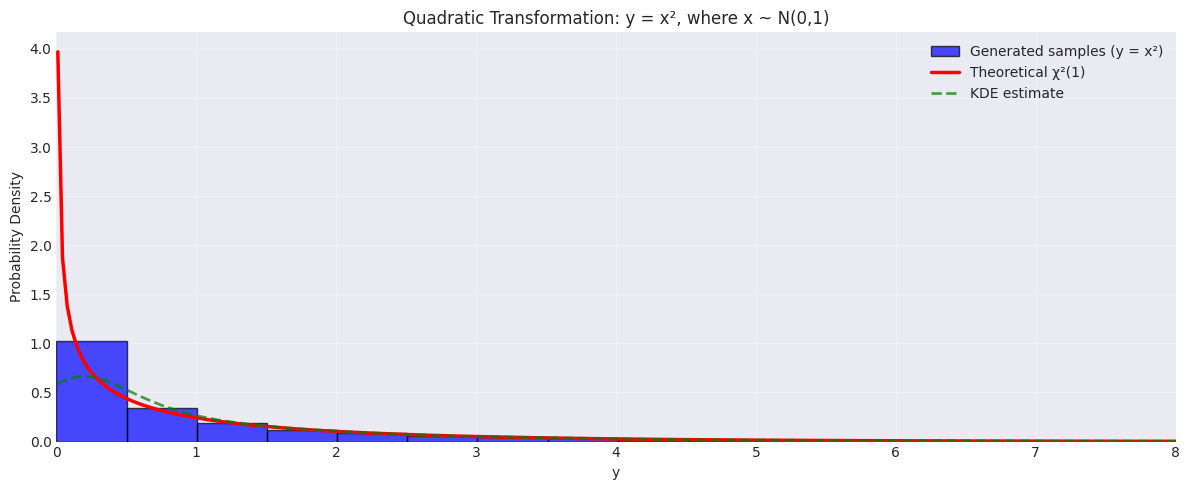

In [8]:
# Example 2b: Quadratic transformation y = x²
# Start with x ~ N(0, 1)

N_samples = 5000
x = np.random.randn(N_samples)
y = x**2  # y should be ~ χ²(1) = chi-squared with 1 degree of freedom

# Theoretical distribution: chi-squared with 1 df
# p(y) = (1/√(2πy)) * exp(-y/2)

print(f"\nQuadratic Transformation: y = x²")
print(f"Expected: χ²(1) distribution")
print(f"Expected mean = 1, variance = 2")
print(f"Observed: mean = {y.mean():.4f}, variance = {y.var():.4f}")

# Plot
fig, ax = plt.subplots(figsize=(12, 5))

# Histogram (only positive y)
y_positive = y[y > 0]
counts, bins, patches = ax.hist(
    y_positive,
    bins=40,
    density=True,
    alpha=0.7,
    color="blue",
    edgecolor="black",
    label="Generated samples (y = x²)",
)

# Theoretical PDF: chi-squared with 1 df
x_range = np.linspace(0.01, 10, 300)
p_theory = stats.chi2.pdf(x_range, df=1)
ax.plot(x_range, p_theory, "r-", linewidth=2.5, label="Theoretical χ²(1)")

# KDE
x_kde, pdf_kde = ksdensity(y_positive, width=0.3, x_axis=x_range)
ax.plot(x_kde, pdf_kde, "g--", linewidth=2, alpha=0.7, label="KDE estimate")

ax.set_xlabel("y")
ax.set_ylabel("Probability Density")
ax.set_title("Quadratic Transformation: y = x², where x ~ N(0,1)")
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim([0, 8])

plt.tight_layout()
plt.show()

## Question 3: Inverse CDF Method for Non-uniform Random Number Generation

### Theory

**Key Insight:** If $U \sim \mathcal{U}(0,1)$ and we define $Y = F^{-1}(U)$ where $F$ is any CDF, then $Y$ has the distribution with CDF $F$.

**Proof:** For $u \in (0,1)$:
$$\Pr(Y \leq y) = \Pr(F^{-1}(U) \leq y) = \Pr(U \leq F(y)) = F(y)$$

where the last step uses that $U$ is uniform on $(0,1)$.

**Algorithm:**
1. Generate $u^{(i)} \sim \mathcal{U}(0,1)$
2. Compute $y^{(i)} = F^{-1}(u^{(i)})$
3. Then $y^{(i)} \sim p(y)$ where $p(y) = \frac{d}{dy}F(y)$


>  Calculate the CDF and the inverse CDF for the exponential distribution:

### Exponential Distribution: CDF and Inverse CDF Derivation

**Given PDF:**
$$p(y) = \exp(-y), \quad y \geq 0$$

This is the exponential distribution with mean $\mu = 1$.

**Step 1: Calculate the CDF**

The cumulative distribution function is:
$$F(y) = \Pr(Y \leq y) = \int_{0}^{y} p(t)\,dt = \int_{0}^{y} \exp(-t)\,dt$$

Evaluating the integral:
$$F(y) = \left[-\exp(-t)\right]_{0}^{y} = -\exp(-y) - (-\exp(0)) = 1 - \exp(-y)$$

$$\boxed{F(y) = 1 - \exp(-y), \quad y \geq 0}$$

**Step 2: Calculate the Inverse CDF**

To find $F^{-1}(u)$, we solve $u = F(y)$ for $y$:
$$u = 1 - \exp(-y)$$

Rearranging:
$$\exp(-y) = 1 - u$$

Taking natural logarithm of both sides:
$$-y = \ln(1 - u)$$

$$y = -\ln(1 - u)$$

$$\boxed{F^{-1}(u) = -\ln(1 - u)}$$

**Simplification:** Since $u \sim \mathcal{U}(0,1)$ implies $(1-u) \sim \mathcal{U}(0,1)$, we can equivalently use:
$$F^{-1}(u) = -\ln(u)$$

This is computationally simpler and commonly used in practice.

**General case:** For exponential distribution with mean $\mu$:
- PDF: $p(y) = \frac{1}{\mu}\exp(-y/\mu)$
- CDF: $F(y) = 1 - \exp(-y/\mu)$
- Inverse CDF: $F^{-1}(u) = -\mu\ln(u)$

> Matlab/Python code for inverse CDF method for generating samples from the exponential distribution:

### Implementation of Inverse CDF Method

The inverse CDF method algorithm:
1. Generate $u^{(i)} \sim \mathcal{U}(0,1)$
2. Apply inverse CDF: $y^{(i)} = F^{-1}(u^{(i)}) = -\ln(u^{(i)})$
3. Then $y^{(i)}$ follows the exponential distribution

In [9]:
def generate_exponential_inverse_cdf(n_samples, mean=1.0):
    """
    Generate exponential random variates using inverse CDF method.

    For exponential distribution with mean mu:
    - PDF: p(y) = (1/mu) * exp(-y/mu), y >= 0
    - CDF: F(y) = 1 - exp(-y/mu)
    - Inverse CDF: F^(-1)(u) = -mu * ln(u)

    Parameters:
    -----------
    n_samples : int
        Number of samples to generate
    mean : float
        Mean parameter (mu) of the exponential distribution

    Returns:
    --------
    y : ndarray
        Samples from exponential distribution
    """
    # Step 1: Generate uniform random variables U(0,1)
    u = np.random.rand(n_samples)

    # Step 2: Apply inverse CDF transformation
    # F^(-1)(u) = -mu * ln(u)
    y = -mean * np.log(u)

    return y


# Generate exponential samples using inverse CDF method
N_exp = 10000
mean_exp = 1.0
y_exp = generate_exponential_inverse_cdf(N_exp, mean=mean_exp)

print(f"Exponential Distribution via Inverse CDF Method")
print(f"=" * 60)
print(f"Number of samples: {N_exp}")
print(f"Mean parameter (mu): {mean_exp}")
print(f"\nTheoretical properties:")
print(f"  Expected mean: {mean_exp}")
print(f"  Expected variance: {mean_exp**2}")
print(f"\nObserved from generated samples:")
print(f"  Sample mean: {y_exp.mean():.4f}")
print(f"  Sample variance: {y_exp.var():.4f}")
print(f"  Sample std: {y_exp.std():.4f}")

Exponential Distribution via Inverse CDF Method
Number of samples: 10000
Mean parameter (mu): 1.0

Theoretical properties:
  Expected mean: 1.0
  Expected variance: 1.0

Observed from generated samples:
  Sample mean: 1.0060
  Sample variance: 0.9817
  Sample std: 0.9908


> Plot histograms/ kernel density estimates and overlay them on the desired exponential density:

### Verification: Comparing Generated Samples with Theoretical Distribution

We verify the inverse CDF method by:
1. Plotting histogram of generated samples
2. Overlaying the theoretical exponential PDF
3. Comparing KDE estimate with theory

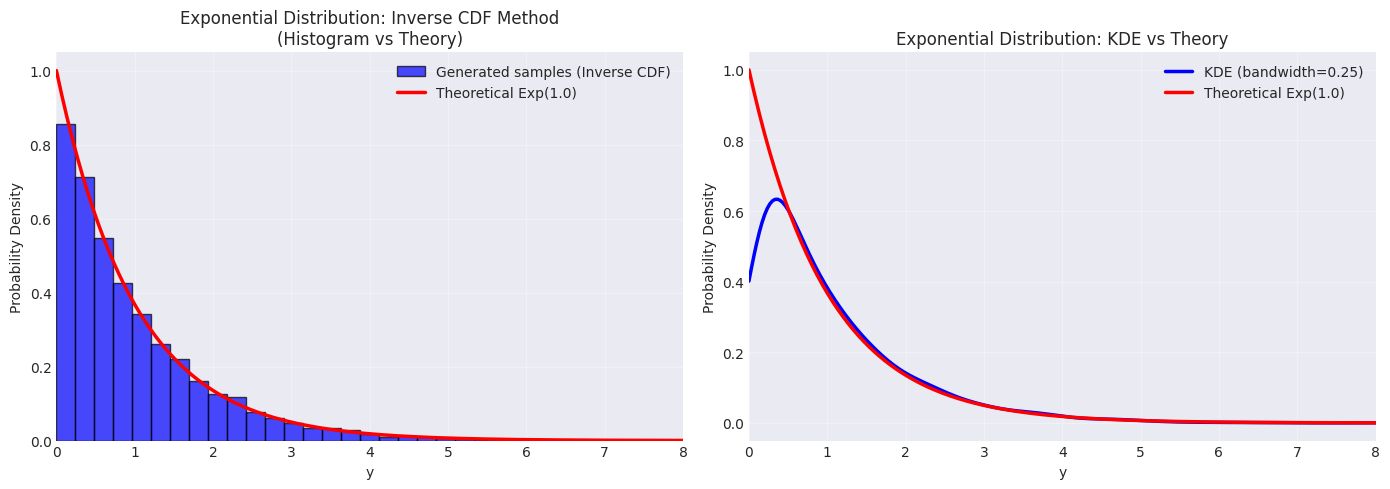


Verification Results:
The histogram and KDE closely match the theoretical exponential PDF.
Sample mean (1.0060) closely matches theoretical (1.0).
Sample variance (0.9817) closely matches theoretical (1.0).

Conclusion: The inverse CDF method successfully generates
samples from the exponential distribution.


In [10]:
# Plot verification: Histogram and KDE vs Theoretical PDF
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Histogram with theoretical overlay
ax = axes[0]
counts, bins, patches = ax.hist(
    y_exp,
    bins=50,
    density=True,
    alpha=0.7,
    color="blue",
    edgecolor="black",
    label="Generated samples (Inverse CDF)",
)

# Theoretical PDF: p(y) = (1/mu) * exp(-y/mu)
x_range = np.linspace(0, 10, 300)
p_theory = stats.expon.pdf(x_range, scale=mean_exp)
ax.plot(
    x_range,
    p_theory,
    "r-",
    linewidth=2.5,
    label=f"Theoretical Exp({mean_exp})",
)

ax.set_xlabel("y")
ax.set_ylabel("Probability Density")
ax.set_title(f"Exponential Distribution: Inverse CDF Method\n(Histogram vs Theory)")
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim([0, 8])

# Plot 2: KDE comparison
ax = axes[1]
bandwidth_exponential = 0.25
x_kde, pdf_kde = ksdensity(y_exp, width=bandwidth_exponential, x_axis=x_range)
ax.plot(
    x_kde,
    pdf_kde,
    "b-",
    linewidth=2.5,
    label=f"KDE (bandwidth={bandwidth_exponential})",
)
ax.plot(
    x_range,
    p_theory,
    "r-",
    linewidth=2.5,
    label=f"Theoretical Exp({mean_exp})",
)

ax.set_xlabel("y")
ax.set_ylabel("Probability Density")
ax.set_title("Exponential Distribution: KDE vs Theory")
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim([0, 8])

plt.tight_layout()
plt.show()

# Verification message
print("\nVerification Results:")
print("=" * 60)
print("The histogram and KDE closely match the theoretical exponential PDF.")
print(f"Sample mean ({y_exp.mean():.4f}) closely matches theoretical ({mean_exp}).")
print(
    f"Sample variance ({y_exp.var():.4f}) closely matches theoretical ({mean_exp**2})."
)
print("\nConclusion: The inverse CDF method successfully generates")
print("samples from the exponential distribution.")

### Analysis: KDE Boundary Effects

**Observation from plots:**

The histogram (left plot) correctly matches the theoretical exponential density, with peak at y = 0 where p(0) = 1.0. However, the KDE (right plot) shows:
- Peak density around 0.65 instead of 1.0
- Curve shifted right and underestimated near y = 0

**Explanation:**

This demonstrates the **boundary effect limitation** of KDE mentioned in Question 1. The exponential distribution has:
- Hard boundary at y = 0 (undefined for y < 0)
- Maximum density at the boundary: p(0) = 1.0

The KDE uses Gaussian kernels that assume data can extend in both directions. When estimating density near y = 0:
1. Each data point contributes a Gaussian centered at that point
2. These Gaussians have tails extending to negative values
3. Probability mass "leaks" into the region y < 0 where it should be zero
4. Since we only evaluate KDE on [0, ∞), this leaked mass is lost
5. Result: systematic underestimation near the boundary

**Key takeaway:** 

The histogram respects the [0, ∞) support of the exponential distribution, while the KDE smooths beyond boundaries. This is a fundamental limitation of standard kernel density estimation for distributions with bounded support, confirming the disadvantage noted in Question 1: "Can exhibit boundary effects (smooths beyond finite support)."

Despite this artifact, both methods confirm the inverse CDF method successfully generates exponential samples, as evidenced by the histogram's excellent match with theory.

## Question 4: Simulation from a 'difficult' density (α-Stable Distribution)

## Question 4: α-Stable Distribution (Heavy-Tailed Random Variables)

**Application:** Communications, signal processing, modeling interference noise that deviates from Gaussian assumptions.

### Generation Recipe

To generate from the α-stable distribution:

**(a)** Choose parameters $\alpha \in (0,2), \alpha \neq 1$ and $\beta \in [-1,+1]$, calculate:
$$b = \frac{1}{\alpha}\tan^{-1}\left(\beta\tan\frac{\pi\alpha}{2}\right)$$
$$s = \left(1 + \beta^2\tan^2\frac{\pi\alpha}{2}\right)^{1/(2\alpha)}$$

**(b)** Generate $U \sim \mathcal{U}(-\pi/2, +\pi/2)$

**(c)** Generate $V \sim \mathcal{E}(1)$ (exponential with mean 1)

**(d)** Calculate:
$$X = s \frac{\sin(\alpha(U + b))}{(\cos(U))^{1/\alpha}}\left(\frac{\cos(U - \alpha(U + b))}{V}\right)^{(1-\alpha)/\alpha}$$

**(e)** Then $X$ follows the α-stable distribution.

### Parameter Interpretation

- **α (stability parameter):** Controls tail heaviness
  - α → 2: Approaches Gaussian distribution (lightest tails)
  - α = 1: Cauchy distribution
  - α → 0: Increasingly heavy tails
  
- **β (skewness parameter):** Controls asymmetry
  - β = 0: Symmetric distribution
  - β > 0: Skewed right
  - β < 0: Skewed left


### Implementation: α-Stable Distribution Generation

Matlab/Python code to generate $N$ random numbers drawn from the distribution of $X$

In [11]:
def generate_stable(alpha, beta, n_samples):
    """
    Generate random samples from alpha-stable distribution.

    Parameters:
    -----------
    alpha : float
        Stability parameter in (0, 2), alpha != 1
    beta : float
        Skewness parameter in [-1, 1]
    n_samples : int
        Number of samples to generate

    Returns:
    --------
    X : ndarray
        Samples from alpha-stable distribution
    """
    # Calculate auxiliary parameters
    b = (1.0 / alpha) * np.arctan(beta * np.tan(np.pi * alpha / 2.0))
    s = (1.0 + beta**2 * np.tan(np.pi * alpha / 2.0) ** 2) ** (1.0 / (2.0 * alpha))

    # Generate uniform and exponential random variables
    U = np.random.uniform(-np.pi / 2.0, np.pi / 2.0, n_samples)
    V = np.random.exponential(scale=1.0, size=n_samples)

    # Apply transformation
    numerator = np.sin(alpha * (U + b)) / (np.cos(U) ** (1.0 / alpha))
    denominator = (np.cos(U - alpha * (U + b)) / V) ** ((1.0 - alpha) / alpha)

    X = s * numerator * denominator

    return X

> Plot some histogram density estimates with $\alpha=0.5,\,1.5$ and several values of $\beta$.

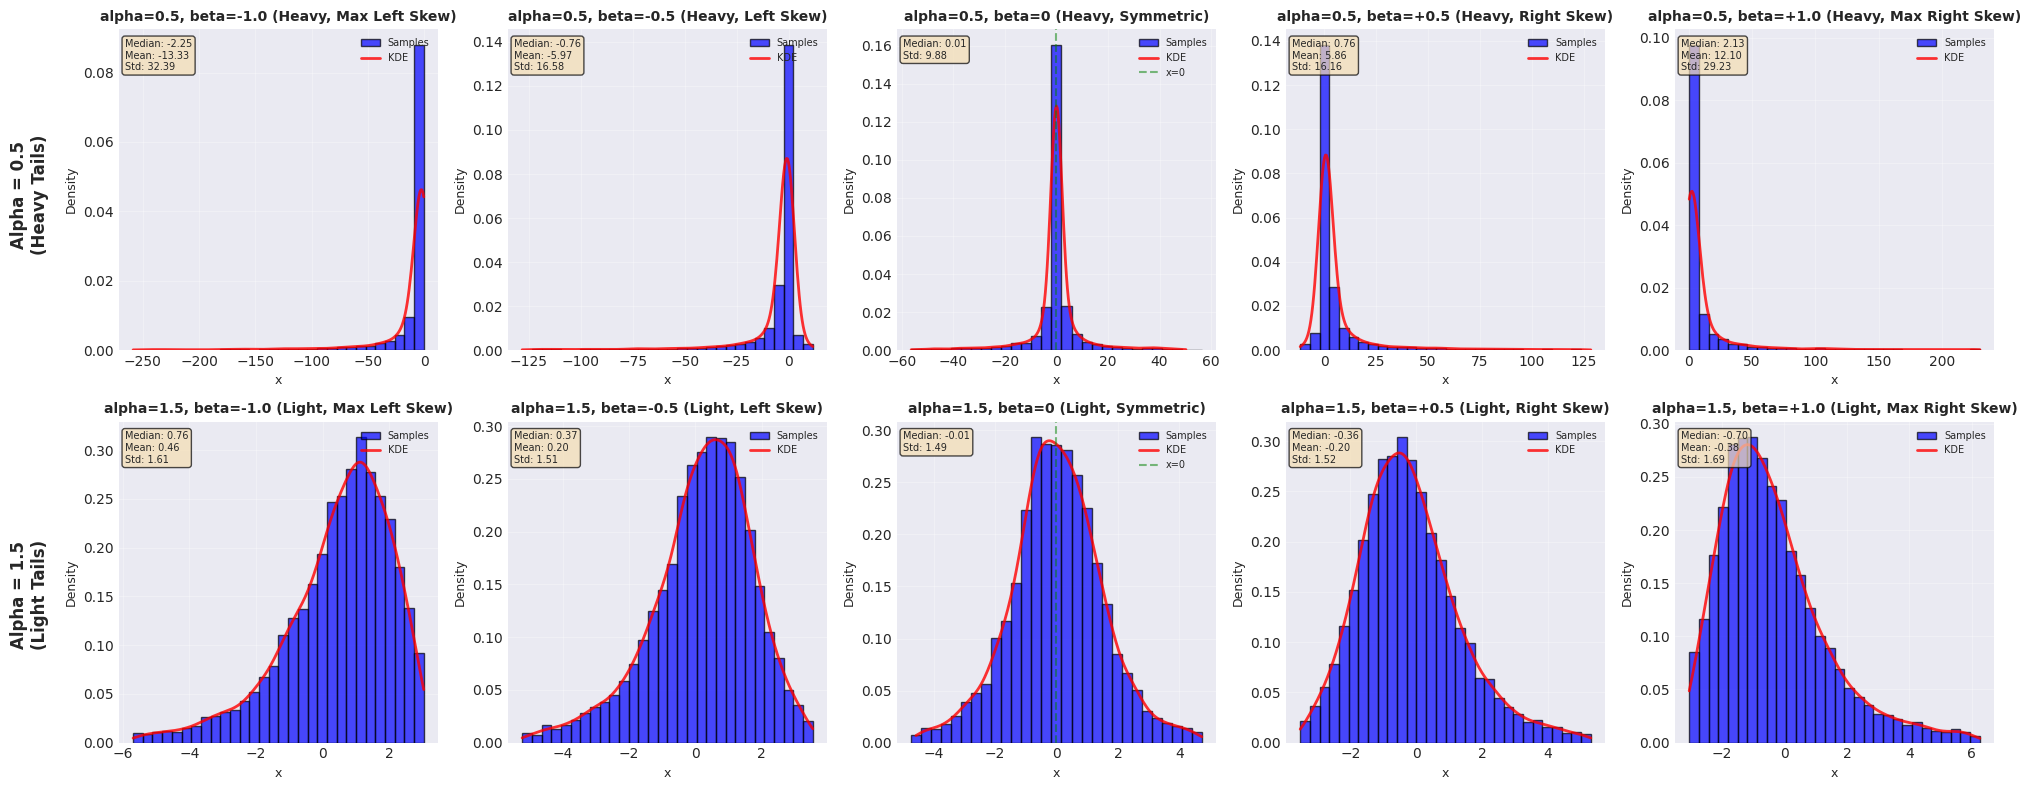


Parameter Interpretation:
Alpha (stability) parameter:
  - alpha = 0.5: Very heavy tails (infinite variance)
  - alpha = 1.5: Lighter tails (still heavier than Gaussian)

Beta (skewness) parameter (compare across columns):
  - beta = -1.0: Maximum left skew
  - beta = -0.5: Moderate left skew
  - beta =  0.0: Symmetric distribution
  - beta = +0.5: Moderate right skew
  - beta = +1.0: Maximum right skew

Note: Plots are zoomed to show central 90-95% of data for clarity.
Compare rows to see effect of alpha (tail heaviness).
Compare columns to see effect of beta (skewness).


In [ ]:
# Generate alpha-stable samples with different parameters

n_samples = 10000

# Test cases: 2 alpha values, 5 beta values each
test_cases = [
    # Alpha = 0.5 (very heavy tails) with varying beta
    (0.5, -1.0, "alpha=0.5, beta=-1.0 (Heavy, Max Left Skew)"),
    (0.5, -0.5, "alpha=0.5, beta=-0.5 (Heavy, Left Skew)"),
    (0.5, 0, "alpha=0.5, beta=0 (Heavy, Symmetric)"),
    (0.5, 0.5, "alpha=0.5, beta=+0.5 (Heavy, Right Skew)"),
    (0.5, 1.0, "alpha=0.5, beta=+1.0 (Heavy, Max Right Skew)"),
    # Alpha = 1.5 (lighter tails) with varying beta
    (1.5, -1.0, "alpha=1.5, beta=-1.0 (Light, Max Left Skew)"),
    (1.5, -0.5, "alpha=1.5, beta=-0.5 (Light, Left Skew)"),
    (1.5, 0, "alpha=1.5, beta=0 (Light, Symmetric)"),
    (1.5, 0.5, "alpha=1.5, beta=+0.5 (Light, Right Skew)"),
    (1.5, 1.0, "alpha=1.5, beta=+1.0 (Light, Max Right Skew)"),
]

# Generate and plot in 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for idx, (alpha, beta, title) in enumerate(test_cases):
    row = idx // 5
    col = idx % 5
    ax = axes[row, col]

    X = generate_stable(alpha, beta, n_samples)

    # Clip extreme outliers for better visualization
    if alpha < 1.0:
        # Very heavy tails - use tighter clipping
        q_low = np.percentile(X, 5)
        q_high = np.percentile(X, 95)
    else:
        # Lighter tails - use wider range
        q_low = np.percentile(X, 2.5)
        q_high = np.percentile(X, 97.5)

    X_clipped = X[(X > q_low) & (X < q_high)]

    # Ensure we have enough data
    if len(X_clipped) < 50:
        X_clipped = X

    # For symmetric distributions (beta=0), use bins centered at 0
    if abs(beta) < 0.01:  # beta ≈ 0
        # Symmetric bins around 0
        max_abs = max(abs(q_low), abs(q_high))
        # Ensure range is not too small
        if max_abs < 1e-10:
            max_abs = 1.0
        bins = np.linspace(-max_abs, max_abs, 30)
    else:
        # Regular bins for skewed distributions
        bins = 30

    # Histogram
    ax.hist(
        X_clipped,
        bins=bins,
        density=True,
        alpha=0.7,
        color="blue",
        edgecolor="black",
        label="Samples",
    )

    # KDE
    x_range = np.linspace(np.min(X_clipped), np.max(X_clipped), 300)
    bandwidth_kde = np.std(X_clipped) * 0.2

    # Ensure bandwidth is not too small
    if bandwidth_kde < 1e-10:
        bandwidth_kde = 1.0

    x_kde, pdf_kde = ksdensity(X_clipped, width=bandwidth_kde, x_axis=x_range)
    ax.plot(
        x_kde,
        pdf_kde,
        "r-",
        linewidth=2,
        alpha=0.8,
        label=f"KDE",
    )

    # Add vertical line at x=0 for symmetric cases
    if abs(beta) < 0.01:
        ax.axvline(
            0, color="green", linestyle="--", linewidth=1.5, alpha=0.5, label="x=0"
        )

    # Statistics
    mean_val = np.mean(X_clipped)
    std_val = np.std(X_clipped)
    median_val = np.median(X_clipped)

    ax.set_xlabel("x", fontsize=9)
    ax.set_ylabel("Density", fontsize=9)
    ax.set_title(title, fontsize=10, fontweight="bold")
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=7, loc="upper right")

    # Add text with stats
    if abs(beta) < 0.01:
        stats_text = f"Median: {median_val:.2f}\nStd: {std_val:.2f}"
    else:
        stats_text = (
            f"Median: {median_val:.2f}\nMean: {mean_val:.2f}\nStd: {std_val:.2f}"
        )

    ax.text(
        0.02,
        0.97,
        stats_text,
        transform=ax.transAxes,
        verticalalignment="top",
        horizontalalignment="left",
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.7),
        fontsize=7,
    )

# Add row labels
fig.text(
    0.01,
    0.75,
    "Alpha = 0.5\n(Heavy Tails)",
    ha="center",
    va="center",
    rotation="vertical",
    fontsize=12,
    fontweight="bold",
)
fig.text(
    0.01,
    0.25,
    "Alpha = 1.5\n(Light Tails)",
    ha="center",
    va="center",
    rotation="vertical",
    fontsize=12,
    fontweight="bold",
)

plt.tight_layout(rect=[0.02, 0, 1, 1])
plt.show()

print("\nParameter Interpretation:")
print("=" * 80)
print("Alpha (stability) parameter:")
print("  - alpha = 0.5: Very heavy tails (infinite variance)")
print("  - alpha = 1.5: Lighter tails (still heavier than Gaussian)")
print("\nBeta (skewness) parameter (compare across columns):")
print("  - beta = -1.0: Maximum left skew")
print("  - beta = -0.5: Moderate left skew")
print("  - beta =  0.0: Symmetric distribution")
print("  - beta = +0.5: Moderate right skew")
print("  - beta = +1.0: Maximum right skew")
print("\nNote: Plots are zoomed to show central 90-95% of data for clarity.")
print("Compare rows to see effect of alpha (tail heaviness).")
print("Compare columns to see effect of beta (skewness).")


> Hence comment on the interpretation of the parameters $\alpha$ and $\beta$.

**α-Stability Parameter (α):**
- **α = 0.5**: Very heavy tails, infinite variance, finite mean
- **α = 1.5**: Lighter tails than α=0.5, but still heavier than Gaussian
- **α → 2.0**: Approaches normal distribution with finite variance

**β-Skewness Parameter (β):**
- **β = 0**: Symmetric distribution
- **β = ±0.5**: Moderate skewness
- **β = ±1.0**: Maximum skewness

**Practical Interpretation:**
- α-stable distributions model phenomena with occasional large outliers
- Higher α → better for normal-like data with light tails
- Lower α → necessary for data with occasional extreme events
- β allows fitting skewed noise in communications and signal processing
